**Based on the Optimization of Convolutional Neural Network In this Notebook I perform the classification using the CNN architecture followed by feature extraction which were further classified using Machine Learning**

In [3]:
#Library import 
!pip3 install gdown
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
np.random.RandomState(seed=42)
!gdown --id 1lUZssANz3BVri3pef2Hxz1XAnlvushrA

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:130: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From (uriginal): https://drive.google.com/uc?id=1lUZssANz3BVri3pef2Hxz1XAnlvushrA
From (redirected): https://drive.google.com/uc?id=1lUZssANz3BVri3pef2Hxz1XAnlvushrA&confirm=t&uuid=d2fa49b3-e842-4636-a3cf-dedad6a1ecc5
To: /kaggle/working/dataset.npy
100%|███████████████████████████████████████| 1.79G/1.79G [00:11<00:00, 149MB/s]


In [4]:

# Load dataset
data = np.load('/kaggle/working/dataset.npy', allow_pickle = True)
data.shape

(11446, 2)

In [5]:
X=[]#features 
Y=[]#target
for x in range(data.shape[0]):
    if data[x][1]==1 or data[x][1]==2 or data[x][1]==3:
        X.append(data[x][0])
        Y.append(data[x][1])
#Creating target variable as sparse 
from sklearn.preprocessing import OneHotEncoder
y=np.array(Y).reshape(-1,1)
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.transform(y).toarray()

In [6]:

#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(np.array(X),y_encoded,test_size=0.2,random_state=42)
#normalizing the pixel values 
x_train=x_train/255.0
x_test=x_test/255.0


In [7]:
model = Sequential()
model.add(Conv2D(
                filters=47,
                kernel_size=3,
                padding="same",
                activation="relu",
                input_shape=(228, 228, 3)
            ))
model.add(Conv2D(
                filters=47,
                kernel_size=3,
                padding="same",
                activation="relu",
                input_shape=(228, 228, 3)
            ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))
model.add(Conv2D(
                filters=47,
                kernel_size=3,
                padding="same",
                activation="relu"
                ))
model.add(Conv2D(
                filters=47,
                kernel_size=3,
                padding="same",
                activation="relu"
                ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))
model.add(Conv2D(
                filters=47,
                kernel_size=3,
                padding="same",
                activation="relu"
                ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(rate=0.51))
model.add(Dense(units=3, activation="softmax"))
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
history=model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

2023-04-07 10:02:32.545617: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


In [9]:
#evaluating the model
eval=model.evaluate(x_test,y_test)
print("Accuracy of the model is : ",eval[1]*100)
print("Loss of the model is : ",eval[0]*100)

10/10 [==============================] - 1s 91ms/step - loss: 0.6372 - accuracy: 0.7718
Accuracy of the model is :  77.18120813369751
Loss of the model is :  63.72256278991699


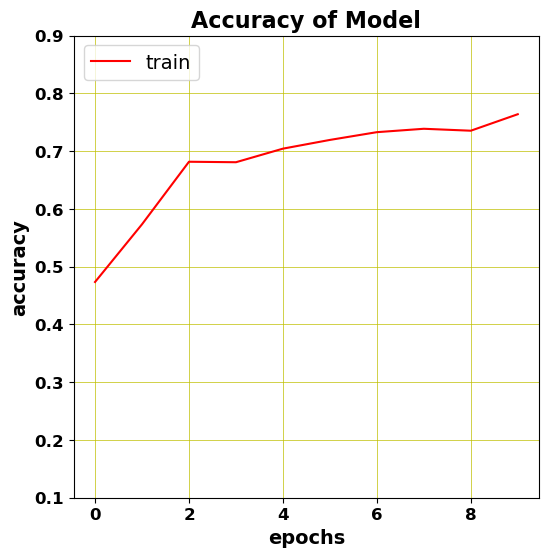

In [10]:
#plotting the model plots
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], color='r')
plt.title('Accuracy of Model', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epochs', weight='bold', fontsize=14)
plt.ylim(0.1, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

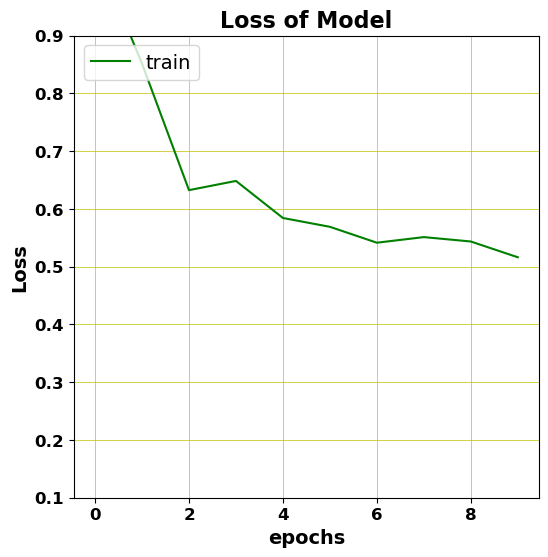

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.figure(figsize=(6,6))
plt.plot(history.history['loss'], color='g')
plt.title('Loss of Model', weight='bold', fontsize=16)
plt.ylabel('Loss', weight='bold', fontsize=14)
plt.xlabel('epochs', weight='bold', fontsize=14)
plt.ylim(0.1, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [13]:
x_train_features = model.predict(x_train)
x_test_features = model.predict(x_test)

# Flatten features
x_train_features = x_train_features.reshape(x_train.shape[0], -1)
x_test_features = x_test_features.reshape(x_test.shape[0], -1)

# Train random forest classifier on features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=150, max_depth=20,random_state=42)
rf.fit(x_train_features, y_train)
y_pred = rf.predict(x_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

10/10 [==============================] - 0s 37ms/step
Accuracy: 70.80536912751678


In [14]:
#confusion matrix and classification report
from sklearn.metrics import classification_report

cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.51      0.55        76
           1       0.55      0.51      0.53        80
           2       0.89      0.92      0.90       142

   micro avg       0.73      0.71      0.72       298
   macro avg       0.67      0.65      0.66       298
weighted avg       0.72      0.71      0.71       298
 samples avg       0.71      0.71      0.71       298



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[ 43,  26,   7],
       [ 29,  41,  10],
       [  4,   7, 131]])

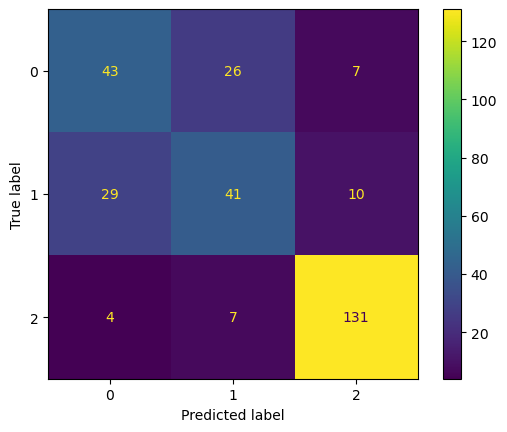

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [17]:
x_train_features = model.predict(x_train)
x_test_features = model.predict(x_test)

# Flatten features
x_train_features = x_train_features.reshape(x_train.shape[0], -1)
x_test_features = x_test_features.reshape(x_test.shape[0], -1)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf=KNeighborsClassifier(n_neighbors=20)
clf.fit(x_train_features, y_train)
y_pred = clf.predict(x_test_features)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

10/10 [==============================] - 0s 36ms/step
Accuracy: 70.13422818791946


In [18]:
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        76
           1       0.57      0.46      0.51        80
           2       0.91      0.92      0.92       142

   micro avg       0.75      0.70      0.73       298
   macro avg       0.69      0.64      0.67       298
weighted avg       0.74      0.70      0.72       298
 samples avg       0.70      0.70      0.70       298



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[ 50,  21,   5],
       [ 35,  37,   8],
       [  4,   7, 131]])

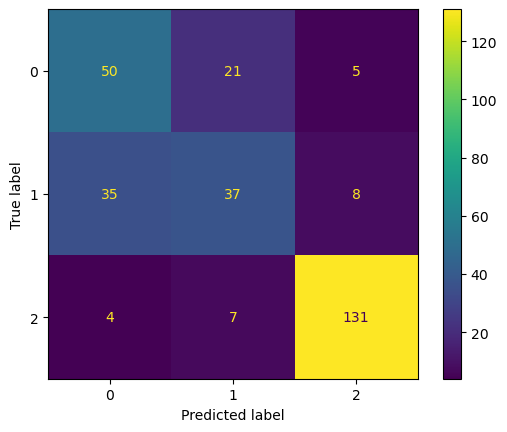

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**Creating an ensemble of weak classifiers to perform classification**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [27]:
estimators=[]
#adding 6 weak svc 
estimators.append(("LSVC1",LinearSVC()))
estimators.append(("LSVC2",LinearSVC()))
estimators.append(("LSVC3",LinearSVC()))
estimators.append(("LSVC4",LinearSVC()))
estimators.append(("LSVC5",LinearSVC()))
estimators.append(("LSVC6",LinearSVC()))
#adding 6 weak dtc
estimators.append(("DTC1",DecisionTreeClassifier()))
estimators.append(("DTC2",DecisionTreeClassifier()))
estimators.append(("DTC3",DecisionTreeClassifier()))
estimators.append(("DTC4",DecisionTreeClassifier()))
estimators.append(("DTC5",DecisionTreeClassifier()))
estimators.append(("DTC6",DecisionTreeClassifier()))
#adding 6 weak knn
estimators.append(("KNN1",KNeighborsClassifier()))
estimators.append(("KNN2",KNeighborsClassifier()))
estimators.append(("KNN3",KNeighborsClassifier()))
estimators.append(("KNN4",KNeighborsClassifier()))
estimators.append(("KNN5",KNeighborsClassifier()))
estimators.append(("KNN6",KNeighborsClassifier()))
#adding 6 weak logistic regression classifier
estimators.append(("LR1",LogisticRegression()))
estimators.append(("LR2",LogisticRegression()))
estimators.append(("LR3",LogisticRegression()))
estimators.append(("LR4",LogisticRegression()))
estimators.append(("LR5",LogisticRegression()))
estimators.append(("LR6",LogisticRegression()))


In [31]:
from sklearn.multioutput import MultiOutputClassifier
def build_model(model,xtrain,ytrain,xtest,ytest):
    clf = model
    clf.fit(xtrain,ytrain)
    clf_predictions = clf.predict(xtest)
    acc = accuracy_score(ytest,clf_predictions)
#     roc_auc=roc_auc_score(ytest,clf_predictions,multi_class="ovo")
    result = {"accuracy:":acc}
    return model,result
ensemble_model,result=build_model(MultiOutputClassifier(VotingClassifier(estimators)),x_train_features,y_train,x_test_features,y_test)

In [32]:
ensemble_model

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('LSVC1',
                                                              LinearSVC()),
                                                             ('LSVC2',
                                                              LinearSVC()),
                                                             ('LSVC3',
                                                              LinearSVC()),
                                                             ('LSVC4',
                                                              LinearSVC()),
                                                             ('LSVC5',
                                                              LinearSVC()),
                                                             ('LSVC6',
                                                              LinearSVC()),
                                                             ('DTC1',
                                                

In [33]:
result

{'accuracy:': 0.7114093959731543}